<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP2_ML/blob/main/TP2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import files

In [4]:
#Load dataset

uploaded_heart = files.upload()

Saving heart.csv to heart (1).csv


In [10]:
#Displaying head of dataset

df = pd.read_csv('heart.csv', delimiter = ',')

df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

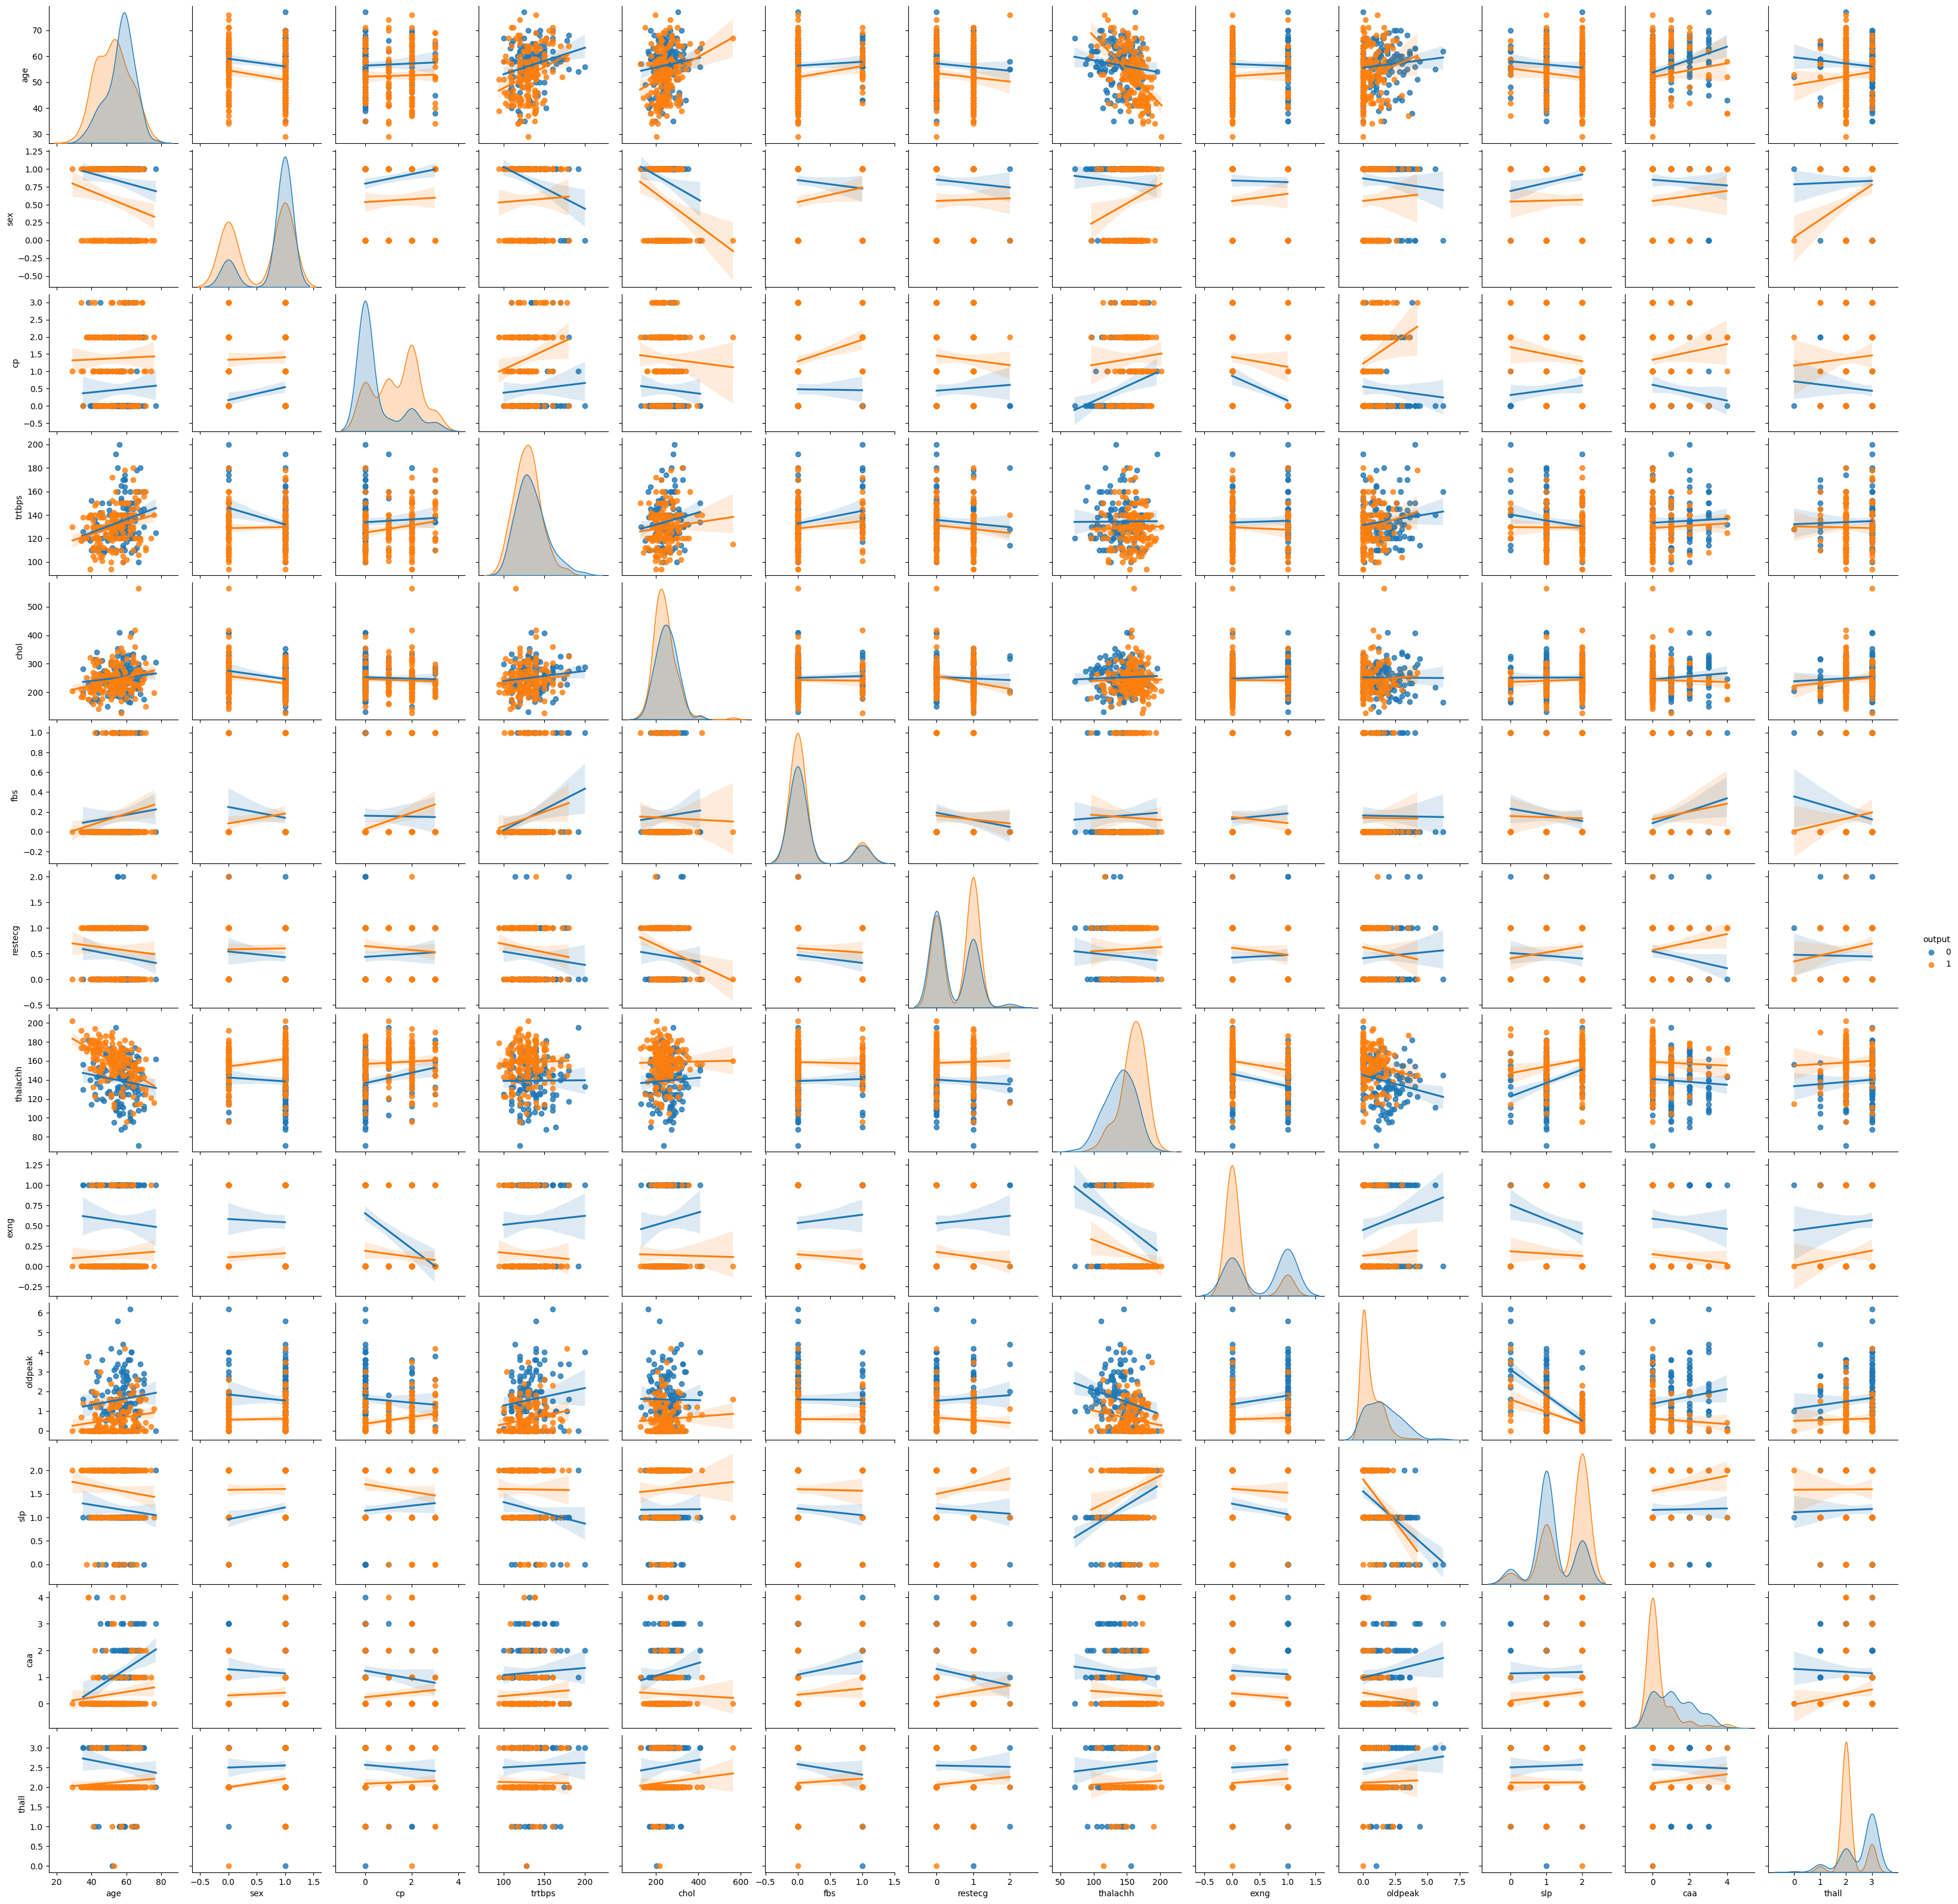

In [12]:
# Visualize the distribution of each feature on graph 

sb.pairplot(df, hue='output', kind="reg")

<Axes: >

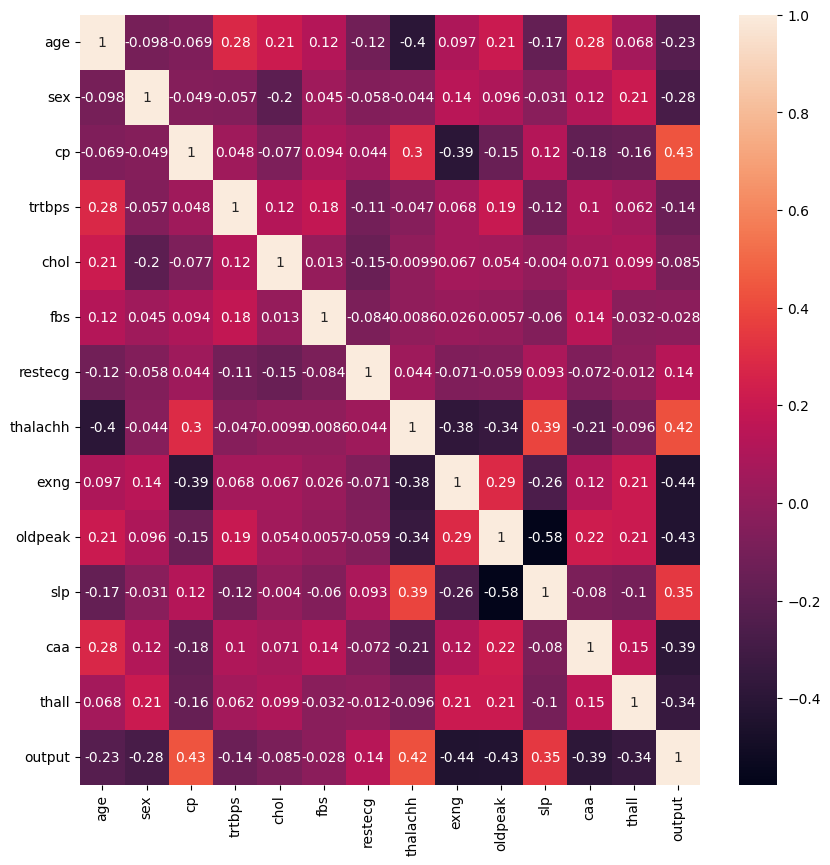

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(df.corr(), annot = True)

In [24]:
# Show the features in order of their correlation with the target (stress_level)
abs(df[df.columns[:]].corr()['output'][:]).sort_values(ascending=False).to_frame()

,output
output,1.000000
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439


In [44]:
#Splitting dataset

X = df.drop(columns = ["fbs", "chol", "restecg", "trtbps"])
y = df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, stratify = None)

In [45]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 10) (242,)
(61, 10) (61,)


In [85]:
#Creating SVM model with default settings
from sklearn import svm

svm_classifier_default = svm.SVC()

#Preprocessing
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train, X_test = std_scale.transform(X_train), std_scale.transform(X_test)

svm_classifier_default.fit(X_train, y_train)

SVC()

In [63]:
#Predicting output

y_pred = svm_classifier_default.predict(X_test)

In [64]:
#Evalutation our model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[13 12]
 [ 4 32]]
Accuracy : 0.7377
Precision : 0.72727
F1 score : 0.8
MEAN SCORE : 0.75499


In [78]:
#Creating another model with manual settings
svm_classifier_manual = svm.SVC(kernel = "poly", C = 7)
svm_classifier_manual.fit(X_train, y_train)

#Predicting
y_pred = svm_classifier_manual.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[15 10]
 [ 6 30]]
Accuracy : 0.7377
Precision : 0.75
F1 score : 0.78947
MEAN SCORE : 0.75906


In [77]:
#Creating SVM model using GridSearchCV
from sklearn.model_selection  import GridSearchCV

svm_model = svm.SVC()

param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : np.arange(1, 10)}
svm_classifier_grid = GridSearchCV(svm_model, param_grid, cv = 5)

svm_classifier_grid.fit(X_train, y_train)
print(svm_classifier_grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [79]:
y_pred = svm_classifier_grid.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[25  0]
 [ 0 36]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


In [82]:
from numpy.random.mtrand import randint
#Creating SVM model using GridSearchCV
from sklearn.model_selection  import RandomizedSearchCV

svm_model = svm.SVC()

param_random = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : randint(1, 10)}
svm_classifier_random = RandomizedSearchCV(svm_model, param_grid, cv = 5)

svm_classifier_random.fit(X_train, y_train)
print(svm_classifier_random.best_params_)

{'kernel': 'linear', 'C': 4}


In [83]:
y_pred = svm_classifier_random.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[25  0]
 [ 0 36]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


In [89]:
#Function to output list of parameters for each model
def get_parameters():
  knn_parameters = {'n_neighbors' : [3, 5, 7], 'weights' : ['uniform', 'distance']}
  svm_parameters = {'kernel' : ['linear', 'poly', 'rbf'], 'C' : [0.1, 1, 100, 1000]}
  return knn_parameters, svm_parameters
 

In [91]:
#Function to split and standardize data
def data_preprocessing(df, drop_columns, output):
  X = df.drop(columns = drop_columns)
  y = df['output']

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, stratify = None)

  std_scale = preprocessing.StandardScaler().fit(X_train)
  X_train, X_test = std_scale.transform(X_train), std_scale.transform(X_test)

  return X_train, X_test, y_train, y_test

In [92]:
X_train, X_test, y_train, y_test = data_preprocessing(df, ["fbs", "chol", "restecg", "trtbps"], "output")